In [2]:
import os
import numpy as np
import pandas as pd
import pickle 
import quandl

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [3]:
quandl.ApiConfig.api_key = 'zZzhwTNJ1Z8SxApaAd8K'

In [4]:
def get_quandl_data(quandl_code):
    cache_path = '{}.pkl'.format(quandl_code).replace('/', '-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)
        print('Loaded {} from cache'.format(quandl_code))
    except (OSError, IOError) as e:
        df = quandl.get(quandl_code, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_code, cache_path))
    return df

In [5]:
btc_usd_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Loaded BCHARTS/KRAKENUSD from cache


In [6]:
btc_usd_kraken.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


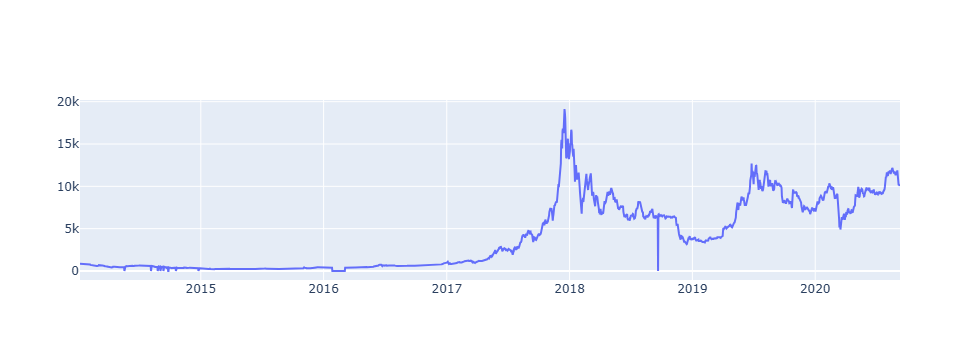

In [7]:
btc_trace = go.Scatter(x=btc_usd_kraken.index, y=btc_usd_kraken['Weighted Price'])
py.iplot([btc_trace])

In [8]:
exchanges = ['COINBASE', 'BITSTAMP', 'ITBIT']

exchange_data = {}
exchange_data['KRAKEN'] = btc_usd_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Loaded BCHARTS/COINBASEUSD from cache
Loaded BCHARTS/BITSTAMPUSD from cache
Loaded BCHARTS/ITBITUSD from cache


In [9]:
def merge_dfs(dataframes, labels, col):
    series_dict = {}
    
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
    return pd.DataFrame(series_dict)

In [10]:
btc_usd_df = merge_dfs(list(exchange_data.values()), list(exchange_data.keys()), 'Weighted Price')

In [11]:
btc_usd_df.tail()

,KRAKEN,COINBASE,BITSTAMP,ITBIT
Date,,,,
2020-09-05,10142.411333,NaN,10194.925438,NaN
2020-09-06,10192.943057,NaN,10191.825931,NaN
2020-09-07,10123.937467,NaN,10107.546429,NaN
2020-09-08,10075.467940,NaN,10098.045560,NaN
2020-09-09,10212.000863,NaN,10196.242267,NaN


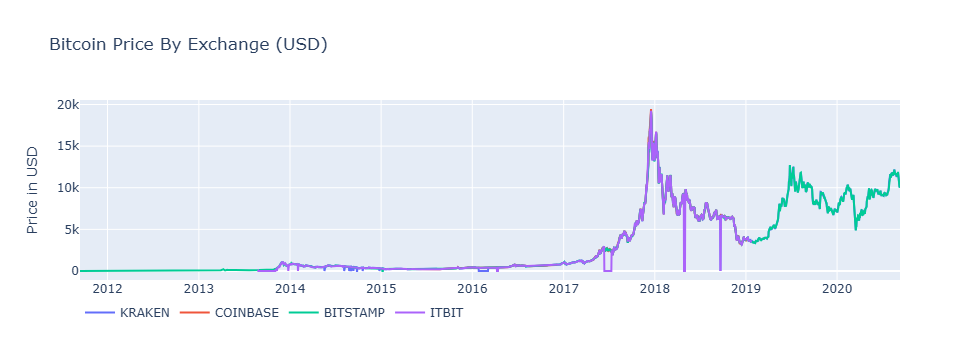

In [12]:
layout = go.Layout(
    title = 'Bitcoin Price By Exchange (USD)',
    legend = {'orientation': 'h'},
    xaxis = {'type': 'date'},
    yaxis = {'title': 'Price in USD'}
)

trace_arr = []
labels = list(btc_usd_df)
for index, label in enumerate(labels):
    series = btc_usd_df[label]
    trace = go.Scatter(x=series.index, y=series, name=label)
    trace_arr.append(trace)
    
fig = go.Figure(data=trace_arr, layout=layout)
py.iplot(fig)

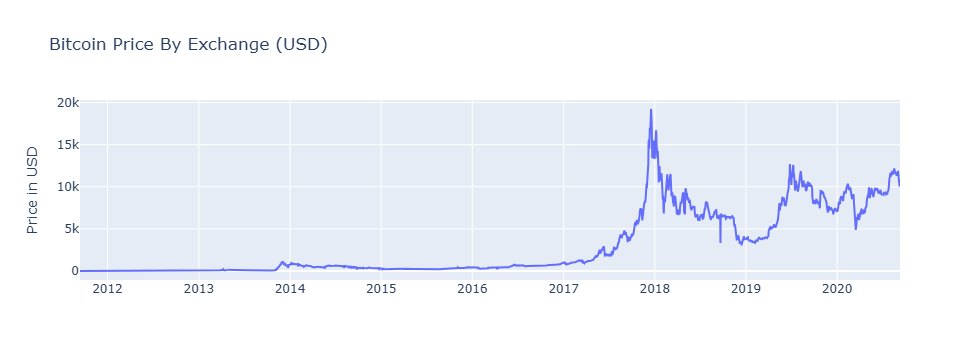

In [13]:
btc_usd_df['avg_usd_price'] = btc_usd_df.mean(axis=1)
btc_trace = go.Scatter(x=btc_usd_df.index, y=btc_usd_df['avg_usd_price'])

fig = go.Figure(data=[btc_trace], layout=layout)
py.iplot(fig)

In [19]:
#!pip install plotly chart-studio ipywidgets
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as cs_py
fig = go.Figure(
    data=[go.Scatter(x=[1, 2, 3, 4], y=[10, 11, 12, 13])],
    layout_title_text="A Sample Chart"
)
chart_studio.tools.set_credentials_file(username='iamarka', api_key='••••••••••')
cs_py.plot(fig, filename='Bitcoin USD Prices', auto_open=True)

print("Plot successfully sent to Chart Studio!")

UnicodeEncodeError: 'latin-1' codec can't encode characters in position 0-9: ordinal not in range(256)